## Exercício de Fixação de Conceitos (EFC) 1 – Sistemas LIT e Convolução
## Gustavo Nascimento Soares - 217530

### Parte Teórica
### a)
----
Seja $x[n] = h[n]*s[n] = \sum_{k = -\infty}^{\infty}{s[k] \cdot h[n-k]}$, é possível concluir que $x[n] \neq 0 \iff s[k] \neq 0 \wedge h[n-k] \neq 0$. Ou seja, quando houver interseção não nula entre essas duas funções.

![alt text](a.png)

Observando os valores de $n$ para o qual existe interseção não nula, percebe-se que $x[n] \neq 0 \iff 0 \leq n \lt K + D - 1$. Logo:

$ P = K + D - 1 $
### b)
----
Seja $h_{i,j}\ (0 \lt i \leq P,\ 0 \lt j \leq K)$ o elemento da $i$-ésima linha e da $j$-ésima coluna de $\textbf{H}$ e $\textbf{s}$ a representação vetorial de $s[n]$. Se:

$
    h_{i,j} = 
\begin{cases}
    h[i - j],& \text{se } 0 \leq i - j \lt D; \\
    0,              & \text{caso contrário}.
\end{cases}
$

e

$\textbf{s} = \Big{[}s[0]\ s[1]\ ...\ s[K-1]\Big{]}^T$

Então $ \textbf{Hs} = \textbf{x} = \Big{[}\sum_{k = -\infty}^{\infty}{s[k] \cdot h[-k]}\ \ \sum_{k = -\infty}^{\infty}{s[k] \cdot h[1-k]}\ \ ...\ \ \sum_{k = -\infty}^{\infty}{s[k] \cdot h[P-1-k]}\Big{]}^T = \Big{[}x[0]\ x[1]\ ...\ x[P-1]\Big{]}^T$.

### Parte Computacional

In [1]:
# Bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constantes do problema
K = 100
D = 2
P = K + D - 1

# Obtenção da matriz de convolução
def get_convolution_matrix(h, x):
    n_h = h.size
    n_x = x.size
    n_y = n_x + n_h - 1
    H = np.zeros((n_y, n_x))
    for i in range(n_x):
        H[:, i][i:i + n_h] = h
    return H

### c)
----
$ h[n] = \delta [n] - 0.5 \delta [n - 1] $

$ h[n] = \begin{cases}    \delta [0], & \text{se } n = 0; \\    - 0.5 \delta [0], & \text{se } n = 1; \\    0, & \text{caso contrário.} \end{cases} $

In [3]:
delta = np.array([1, 0])
h = delta - .5*np.roll(delta, 1)
h

array([ 1. , -0.5])

### d)
----
$ \delta [n] = h[n] * w[n] $
* $ n \lt 0: w[n] = 0; $
* $ n = 0: w[0] - 0.5w[-1] = 1 \Longrightarrow w[0] = 1; $
* $ n \gt 0: w[n] - 0.5w[n-1] = 0 \Longrightarrow w[n] = 0.5^{n}. $

### e)
----

In [4]:
w = (
    np.array([.5**i for i in range(5)]),
    np.array([1, 1.5, 0.7, -0.2, 0.3]),
)

g = tuple(get_convolution_matrix(w[i], h)@h for i in range(2))

In [5]:
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
def print_latex(text):
    ax = plt.axes([0]*4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    plt.text(0, 0,'%s' %text, size=12, color="k")
    plt.show()

In [6]:
delta = np.zeros(6)
delta[0] = 1
for i in range(2):
    print_latex(r'$g_{0}$ = {1}'.format(i + 1, g[i]))
for i in range(2):
    print_latex(r'$||g_{0} - \delta||$ = {1:.5f}'.format(i + 1, np.linalg.norm(g[i] - delta)))

$w_1$ é bem melhor porque $g_1$ está mais próximo de $\delta$ do que $g_2$.

### f)
----

In [7]:
# Plot arguments
plt_args_in = {
    'basefmt': 'k',
    'linefmt': 'grey',
    'markerfmt': 'o',
    'use_line_collection': True,
}
plt_args_out = {
    'basefmt': 'k',
    'linefmt': 'grey',
    'markerfmt': 'D',
    'use_line_collection': True,
}
# Plot decoration
def set_markerlinecolors(markerline, facecolor, edgecolor):
    markerline.set_markerfacecolor(facecolor)
    markerline.set_markeredgecolor(edgecolor)
def set_axstyle(ax):
    ax.set_xlabel(r'$n$', fontsize=14)
    ax.axhline(y=0, c='k', linewidth=.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc=1, fontsize=14)

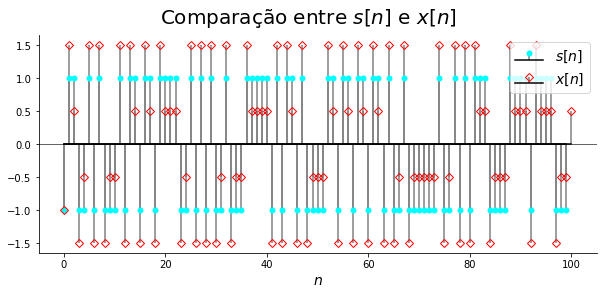

In [8]:
s = np.sign(np.random.randn(K))
x = get_convolution_matrix(h, s)@s


fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle(r'Comparação entre $s[n]$ e $x[n]$', fontsize=20)

set_markerlinecolors(ax.stem(s, **plt_args_in, label=r'$s[n]$')[0], 'aqua', 'none')
set_markerlinecolors(ax.stem(x, **plt_args_out, label=r'$x[n]$')[0], 'none', 'red')

set_axstyle(ax)

plt.show()

### g)
----

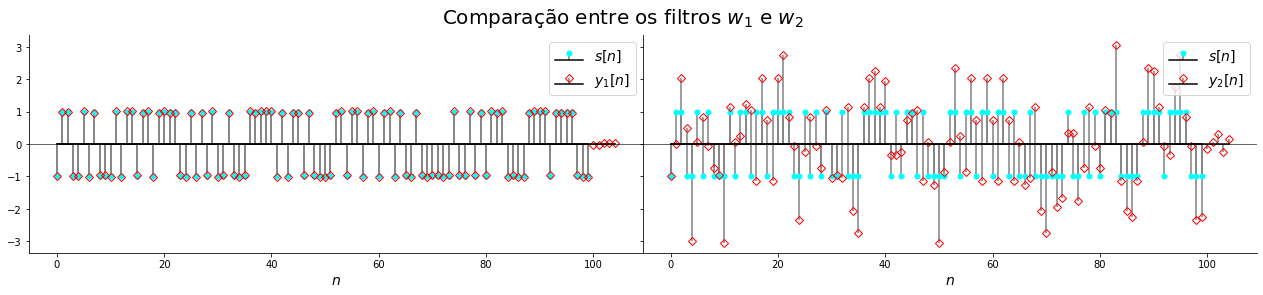

In [9]:
y = tuple(get_convolution_matrix(w[i], x)@x for i in range(2))


fig, axs = plt.subplots(1, 2, sharey=True, figsize=(22, 4), gridspec_kw={'wspace': 0})
fig.suptitle(r'Comparação entre os filtros $w_1$ e $w_2$', fontsize=20)

for i in range(2):
    set_markerlinecolors(axs[i].stem(s, **plt_args_in, label=r'$s[n]$')[0], 'aqua', 'none')
    set_markerlinecolors(axs[i].stem(y[i], **plt_args_out, label=r'$y_{}[n]$'.format(i + 1))[0], 'none', 'red')

for ax in axs:
    set_axstyle(ax)
for ax in axs.flat:
    ax.label_outer()

plt.show()

$y_1[n]$ está mais próxima do sinal original $s[n]$.